In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

random.seed(117)

In [2]:
plt.rcParams.update(
    {
        'lines.linewidth': 2,
        'axes.titlesize': 10,
        'axes.labelsize': 10,
        'xtick.labelsize': 8,
        'ytick.labelsize': 8,
        'xtick.major.size': 7,
        'ytick.major.size': 7,
        'legend.numpoints': 1,
    }
)

In [3]:
class styleIterator(object):
    def __init__(self, styles):
        self.index = 0
        self.styles = styles

    def nextStyle(self):
        result = self.styles[self.index]
        if self.index == len(self.styles) - 1:
            self.index = 0
        else:
            self.index += 1
        return result

# stochastic process

example: roll a die, to calculate the probability to get '11111', what would you do?

In [4]:
def rollDie():
    """returns a random int between 1 and 6"""
    return random.choice([1,2,3,4,5,6])  # equally probable to chose a number

def testRoll(n=10):
    restult = ''
    for i in range(n):
        result = result + str(rollDie())
    print(result)

In [5]:
def runSim(goal, numTrials, txt):
    total = 0
    for i in range(numTrials):
        result = ''
        for j in range(len(goal)):
            result += str(rollDie())
        if result == goal:
            total += 1
        print('Actual probability of', txt, '=', round(1/(6**len(goal)), 8))
        estProbability =round(total/numTrials, 8)
        print('Estimated Probability of', txt, '=', round(estProbability, 8))

In [6]:
# runSim('11111', 100, '11111')

# Random walks

How far away the drunk will be after 1 step?
How far away the drunk will be after 2 steps?
How far away the drunk will be after 1000 steps?
How far away the drunk will be after n steps?

In [7]:
class Location(object):
    def __init__(self, x, y):
        """x and y are numbers"""
        self.x = x
        self.y = y

    def move(self, deltaX, deltaY):
        """deltaX and deltaY are numbers"""
        return Location(self.x + deltaX, self.y + deltaY)

    def getX(self):
        return self.x

    def getY(self):
        return self.y

    def distFrom(self, other):
        xDist = self.x - other.getX()
        yDist = self.y - other.getY()
        return (xDist**2 + yDist**2)**0.5 # Pythagorean theorem

    def __str__(self):
        return '<' + str(self.x) + ', ' + str(self.y) + '>'

In [8]:
class Field(object):
    def __init__(self):
        self.drunks = {}
        
    def addDrunk(self, drunk, loc):
        if drunk in self.drunks:
            raise ValueError('Duplicate drunk')
        else:
            self.drunks[drunk] = loc
            
    def moveDrunk(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        xDist, yDist = drunk.takeStep()
        #use move method of Location to get new location
        self.drunks[drunk] = self.drunks[drunk].move(xDist, yDist)
        
    def getLoc(self, drunk):
        if drunk not in self.drunks:
            raise ValueError('Drunk not in field')
        return self.drunks[drunk]

In [9]:
class Drunk(object):
    def __init__(self, name = None):
        """Assumes name is a str"""
        self.name = name

    def __str__(self):
        if self != None:
            return self.name
        return 'Anonymous'

In [10]:
class UsualDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0,1), (0,-1), (1, 0), (-1, 0)]
        return random.choice(stepChoices)

In [11]:
class MasochistDrunk(Drunk):
    def takeStep(self):
        stepChoices = [(0.0,1.1), (0.0,-0.9),
                       (1.0, 0.0), (-1.0, 0.0)]
        return random.choice(stepChoices)

In [12]:
def walk(f, d, numSteps):
    """Assumes: f a Field, d a Drunk in f, and numSteps an int >= 0.
       Moves d numSteps times, and returns the distance between
       the final location and the location at the start of the 
       walk."""
    start = f.getLoc(d)
    for s in range(numSteps):
        f.moveDrunk(d)
    return start.distFrom(f.getLoc(d))

In [13]:
def simWalks(numSteps, numTrials, dClass):
    """Assumes numSteps an int >= 0, numTrials an int > 0,
         dClass a subclass of Drunk
       Simulates numTrials walks of numSteps steps each.
       Returns a list of the final distances for each trial"""
    Homer = dClass('Homer')
    origin = Location(0, 0)
    distances = []
    for t in range(numTrials):
        f = Field()
        f.addDrunk(Homer, origin)
        distances.append(round(walk(f, Homer,
                                    numSteps), 1))
    return distances

In [14]:
def drunkTest(walkLengths, numTrials, dClass):
    """Assumes walkLengths a sequence of ints >= 0
         numTrials an int > 0, dClass a subclass of Drunk
       For each number of steps in walkLengths, runs simWalks with
         numTrials walks and prints results"""
    for numSteps in walkLengths:
        distances = simWalks(numSteps, numTrials, dClass)
        print(dClass.__name__, 'random walk of', numSteps, 'steps')
        print(' Mean =', round(sum(distances)/len(distances), 4))
        print(' Max =', max(distances), 'Min =', min(distances))

simulation for two different drunks

In [15]:
drunkTest((10, 100, 1000, 10000), 100, UsualDrunk)

UsualDrunk random walk of 10 steps
 Mean = 2.816
 Max = 7.1 Min = 0.0
UsualDrunk random walk of 100 steps
 Mean = 9.178
 Max = 24.1 Min = 1.4
UsualDrunk random walk of 1000 steps
 Mean = 28.377
 Max = 77.8 Min = 1.4
UsualDrunk random walk of 10000 steps
 Mean = 86.703
 Max = 189.8 Min = 9.5


In [16]:
drunkTest((10, 100, 1000, 10000), 100, MasochistDrunk)

MasochistDrunk random walk of 10 steps
 Mean = 2.506
 Max = 5.6 Min = 0.2
MasochistDrunk random walk of 100 steps
 Mean = 9.729
 Max = 20.5 Min = 1.1
MasochistDrunk random walk of 1000 steps
 Mean = 57.406
 Max = 105.2 Min = 11.3
MasochistDrunk random walk of 10000 steps
 Mean = 507.349
 Max = 655.6 Min = 344.1


In [17]:
def simDrunk(numTrials, dClass, walkLengths):
    meanDistances = []
    for numSteps in walkLengths:
        print('Starting simulation of',
              numSteps, 'steps')
        trials = simWalks(numSteps, numTrials, dClass)
        mean = sum(trials)/len(trials)
        meanDistances.append(mean)
    return meanDistances

In [18]:
def simAll(drunkKinds, walkLengths, numTrials):
    styleChoice = styleIterator(('m-', 'b--', 'g-.'))
    for dClass in drunkKinds:
        curStyle = styleChoice.nextStyle()
        print('Starting simulation of', dClass.__name__)
        means = simDrunk(numTrials, dClass, walkLengths)
        plt.plot(walkLengths, means, curStyle,
                   label = dClass.__name__)
    plt.title('Mean Distance from Origin ('
                + str(numTrials) + ' trials)')
    plt.xlabel('Number of Steps')
    plt.ylabel('Distance from Origin')
    plt.legend(loc = 'best')


Starting simulation of UsualDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps
Starting simulation of MasochistDrunk
Starting simulation of 10 steps
Starting simulation of 100 steps
Starting simulation of 1000 steps
Starting simulation of 10000 steps
Starting simulation of 100000 steps


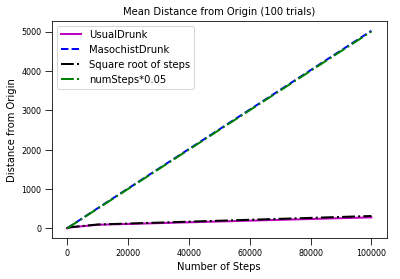

In [19]:
numSteps = (10,100,1000,10000,100000)
simAll((UsualDrunk, MasochistDrunk), numSteps, 100)

plt.plot(numSteps, np.array(numSteps)**0.5, 'k-.',
          label = 'Square root of steps')
plt.plot(numSteps, np.array(numSteps)*0.05, 'g-.',
          label = 'numSteps*0.05')
plt.legend(loc = 'best')

In [20]:
class OddField(Field):
    def __init__(self, numHoles = 1000,
                 xRange = 100, yRange = 100):
        Field.__init__(self)
        self.wormholes = {}
        for w in range(numHoles):
            x = random.randint(-xRange, xRange)
            y = random.randint(-yRange, yRange)
            newX = random.randint(-xRange, xRange)
            newY = random.randint(-yRange, yRange)
            newLoc = Location(newX, newY)
            self.wormholes[(x, y)] = newLoc

    def moveDrunk(self, drunk):
        Field.moveDrunk(self, drunk)
        x = self.drunks[drunk].getX()
        y = self.drunks[drunk].getY()
        if (x, y) in self.wormholes:
            self.drunks[drunk] = self.wormholes[(x, y)]

In [21]:
def getFinalLocs(numSteps, numTrials, dClass):
    locs = []
    d = dClass()
    for t in range(numTrials):
        f = OddField()
        f.addDrunk(d, Location(0, 0))
        for s in range(numSteps):
            f.moveDrunk(d)
        locs.append(f.getLoc(d))
    return locs

def plotLocs(drunkKinds, numSteps, numTrials):
    styleChoice = styleIterator(('k+', 'r^', 'mo'))
    for dClass in drunkKinds:
        locs = getFinalLocs(numSteps, numTrials, dClass)
        xVals, yVals = [], []
        for loc in locs:
            xVals.append(loc.getX())
            yVals.append(loc.getY())
        xVals = np.array(xVals)
        yVals = np.array(yVals)
        meanX = sum(abs(xVals))/len(xVals)
        meanY = sum(abs(yVals))/len(yVals)
        curStyle = styleChoice.nextStyle()
        plt.plot(xVals, yVals, curStyle,
                      label = dClass.__name__ +
                      ' mean abs dist = <'
                      + str(meanX) + ', ' + str(meanY) + '>')
    plt.title('Location at End of Walks ('
                + str(numSteps) + ' steps)')
    plt.ylim(-1000, 1000)
    plt.xlim(-1000, 1000)
    plt.xlabel('Steps East/West of Origin')
    plt.ylabel('Steps North/South of Origin')
    plt.legend(loc = 'lower center')

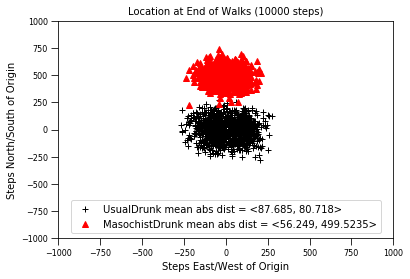

In [22]:
plotLocs((UsualDrunk, MasochistDrunk), 10000, 1000)

# Monte Carlo Simulation

a random sample tends to exhibit the same properties as the population from which it is drawn

Fair roulette: expected return is 0

In [23]:
class FairRoulette():
    def __init__(self):
        self.pockets = []
        for i in range(1,37):
            self.pockets.append(i)
        self.ball = None
        self.pocketOdds = len(self.pockets) - 1
    def spin(self):
        self.ball = random.choice(self.pockets)
    def betPocket(self, pocket, amt):
        if str(pocket) == str(self.ball):
            return amt*self.pocketOdds # make the roulette fair
        else: return -amt
    def __str__(self):
        return 'Fair Roulette'

In [24]:
def playRoulette(game, numSpins, pocket, bet, toPrint):
    totPocket = 0
    for i in range(numSpins):
        game.spin()
        totPocket += game.betPocket(pocket, bet)
    if toPrint:
        print(numSpins, 'spins of', game)
        print('Expected return betting', pocket, '=',\
              str(100*totPocket/numSpins) + '%\n')
    return (totPocket/numSpins)

In [25]:
game = FairRoulette()
for numSpins in (100, 1000000):
    for i in range(3):
        playRoulette(game, numSpins, 2, 1, True)

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = -28.0%

100 spins of Fair Roulette
Expected return betting 2 = 80.0%

1000000 spins of Fair Roulette
Expected return betting 2 = -0.4384%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.2096%

1000000 spins of Fair Roulette
Expected return betting 2 = 0.3284%



### Law of large numbers

as the number of identical independent test (iid) goes to infinity the average results converge to the expected value.

### unfair roulette
<img src='https://www.roulettephysics.com/wp-content/uploads/2015/12/roulette-wheel-diagram1.png'>

In [26]:
class EuRoulette(FairRoulette):
    def __init__(self):
        FairRoulette.__init__(self)
        self.pockets.append('0')
    def __str__(self):
        return 'European Roulette'

class AmRoulette(EuRoulette):
    def __init__(self):
        EuRoulette.__init__(self)
        self.pockets.append('00')
    def __str__(self):
        return 'American Roulette'

In [27]:
def findPocketReturn(game, numTrials, trialSize, toPrint):
    pocketReturns = []
    for t in range(numTrials):
        trialVals = playRoulette(game, trialSize, 2, 1, toPrint)
        pocketReturns.append(trialVals)
    return pocketReturns

In [28]:
numTrials = 20
resultDict = {}
games = (FairRoulette, EuRoulette, AmRoulette)
for G in games:
    resultDict[G().__str__()] = []
for numSpins in (1000, 10000, 100000, 1000000):
    print('\nSimulate', numTrials, 'trials of',
          numSpins, 'spins each')
    for G in games:
        pocketReturns = findPocketReturn(G(), numTrials,
                                         numSpins, False)
        expReturn = 100*sum(pocketReturns)/len(pocketReturns)
        print('Exp. return for', G(), '=',
             str(round(expReturn, 4)) + '%')


Simulate 20 trials of 1000 spins each
Exp. return for Fair Roulette = 2.96%
Exp. return for European Roulette = -4.6%
Exp. return for American Roulette = -9.46%

Simulate 20 trials of 10000 spins each
Exp. return for Fair Roulette = -1.18%
Exp. return for European Roulette = -1.468%
Exp. return for American Roulette = -4.816%

Simulate 20 trials of 100000 spins each
Exp. return for Fair Roulette = -0.0136%
Exp. return for European Roulette = -2.8108%
Exp. return for American Roulette = -5.7682%

Simulate 20 trials of 1000000 spins each
Exp. return for Fair Roulette = 0.0035%
Exp. return for European Roulette = -2.5228%
Exp. return for American Roulette = -5.1747%


# Markov Chains Monte Carlo 
Markov Chains: past and fufure are conditionally independent given the present

$P(X_{n+1} = j \mid X_n = i, X_{n-1} = i_{n-1}, X_{n-2} = i_{n-2}, ...)
=P(X_{n+1} = j \mid X_n = i)$


Text(0,0.5,'Probability')

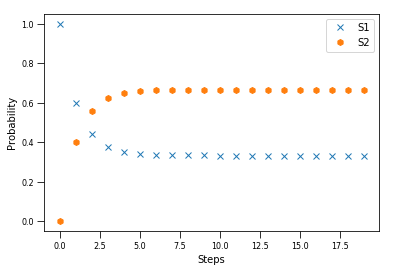

In [8]:
# transition matrix 

P = np.matrix([[0.6, 0.4],
               [0.2, 0.8],])
p0 = np.matrix([[1, 0]])

plot_data = []
for step in range(20):
    result = p0*P**step
    plot_data.append(np.array(result).flatten())
    
plot_data = np.array(plot_data)

lines = []

for i, shape in zip(range(2), ['x', 'h']):
    line, = plt.plot(plot_data[:, i], shape, label="S%i" % (i+1))
    lines.append(line)
plt.legend(handles=lines, loc=1)
plt.xlabel('Steps')
plt.ylabel('Probability')